# Merging the Thermal and NDVI Data

In [1]:
import ee, eemont, geemap
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# Load the first CSV file into a pandas DataFrame
thermal = pd.read_csv('summer_thermal.csv')

# Load the second CSV file into a pandas DataFrame
ndvi = pd.read_csv('summer_ndvi.csv')



In [2]:
print(ndvi)

                    date  station_0  station_1  Difference
0    1985-06-12 17:37:54   0.338665   0.482379    0.143714
1    1985-07-14 17:37:44   0.350633   0.414933    0.064300
2    1985-08-15 17:37:27   0.347705   0.452970    0.105265
3    1985-08-31 17:37:16   0.344685   0.440350    0.095665
4    1985-09-16 17:37:03   0.350909   0.464560    0.113652
..                   ...        ...        ...         ...
300  2021-06-15 18:07:38   0.361722   0.531743    0.170021
301  2021-07-17 18:07:43   0.353555   0.482666    0.129111
302  2021-09-03 18:08:02   0.403683   0.548711    0.145028
303  2021-10-05 18:08:11   0.350219   0.511189    0.160970
304  2021-10-21 18:08:14   0.361043   0.536456    0.175413

[305 rows x 4 columns]


In [3]:
print(thermal)

                    date   station_0   station_1  Difference
0    1985-06-12 17:37:54  308.445845  304.030315   -4.415530
1    1985-07-14 17:37:44  303.431483  299.238118   -4.193365
2    1985-08-15 17:37:27  307.156234  303.527529   -3.628705
3    1985-08-31 17:37:16  308.211209  304.993774   -3.217435
4    1985-09-16 17:37:03  298.840532  295.672894   -3.167639
..                   ...         ...         ...         ...
300  2021-06-15 18:07:38  313.892354  309.919310   -3.973044
301  2021-07-17 18:07:43  310.382498  307.102330   -3.280168
302  2021-09-03 18:08:02  299.926420  297.788521   -2.137899
303  2021-10-05 18:08:11  293.041188  292.895751   -0.145437
304  2021-10-21 18:08:14  289.364493  288.541948   -0.822545

[305 rows x 4 columns]


In [4]:
ndvi = ndvi.rename(columns={'date': 'Date', 'station_0': 'NDVI_0', 'station_1': 'NDVI_1', 'Difference' : 'NDVI_Diff'})

In [5]:
print(ndvi)

                    Date    NDVI_0    NDVI_1  NDVI_Diff
0    1985-06-12 17:37:54  0.338665  0.482379   0.143714
1    1985-07-14 17:37:44  0.350633  0.414933   0.064300
2    1985-08-15 17:37:27  0.347705  0.452970   0.105265
3    1985-08-31 17:37:16  0.344685  0.440350   0.095665
4    1985-09-16 17:37:03  0.350909  0.464560   0.113652
..                   ...       ...       ...        ...
300  2021-06-15 18:07:38  0.361722  0.531743   0.170021
301  2021-07-17 18:07:43  0.353555  0.482666   0.129111
302  2021-09-03 18:08:02  0.403683  0.548711   0.145028
303  2021-10-05 18:08:11  0.350219  0.511189   0.160970
304  2021-10-21 18:08:14  0.361043  0.536456   0.175413

[305 rows x 4 columns]


In [6]:
thermal = thermal.rename(columns={'date': 'Date', 'station_0': 'Thermal_0', 'station_1': 'Thermal_1', 'Difference' : 'Thermal_Diff'})

In [7]:
print(thermal)

                    Date   Thermal_0   Thermal_1  Thermal_Diff
0    1985-06-12 17:37:54  308.445845  304.030315     -4.415530
1    1985-07-14 17:37:44  303.431483  299.238118     -4.193365
2    1985-08-15 17:37:27  307.156234  303.527529     -3.628705
3    1985-08-31 17:37:16  308.211209  304.993774     -3.217435
4    1985-09-16 17:37:03  298.840532  295.672894     -3.167639
..                   ...         ...         ...           ...
300  2021-06-15 18:07:38  313.892354  309.919310     -3.973044
301  2021-07-17 18:07:43  310.382498  307.102330     -3.280168
302  2021-09-03 18:08:02  299.926420  297.788521     -2.137899
303  2021-10-05 18:08:11  293.041188  292.895751     -0.145437
304  2021-10-21 18:08:14  289.364493  288.541948     -0.822545

[305 rows x 4 columns]


In [8]:
# Merge the two DataFrames on a common column
merged = pd.merge(thermal, ndvi, how = 'outer')

In [9]:
print(merged)

                    Date   Thermal_0   Thermal_1  Thermal_Diff    NDVI_0  \
0    1985-06-12 17:37:54  308.445845  304.030315     -4.415530  0.338665   
1    1985-07-14 17:37:44  303.431483  299.238118     -4.193365  0.350633   
2    1985-08-15 17:37:27  307.156234  303.527529     -3.628705  0.347705   
3    1985-08-31 17:37:16  308.211209  304.993774     -3.217435  0.344685   
4    1985-09-16 17:37:03  298.840532  295.672894     -3.167639  0.350909   
..                   ...         ...         ...           ...       ...   
300  2021-06-15 18:07:38  313.892354  309.919310     -3.973044  0.361722   
301  2021-07-17 18:07:43  310.382498  307.102330     -3.280168  0.353555   
302  2021-09-03 18:08:02  299.926420  297.788521     -2.137899  0.403683   
303  2021-10-05 18:08:11  293.041188  292.895751     -0.145437  0.350219   
304  2021-10-21 18:08:14  289.364493  288.541948     -0.822545  0.361043   

       NDVI_1  NDVI_Diff  
0    0.482379   0.143714  
1    0.414933   0.064300  
2    0

In [10]:
# Write the merged DataFrame to a new CSV file
#merged_df.to_csv('merged_file.csv', index=False)

### Creating Plots from Merged Data Table

#### NDVI Temperature Diff

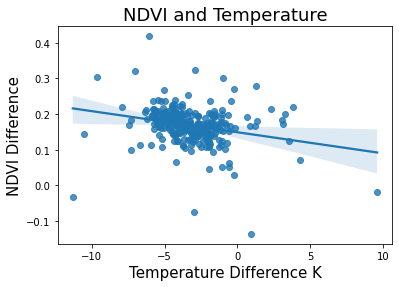

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with regression line
sns.regplot(data=merged, x='Thermal_Diff', y='NDVI_Diff')
plt.xlabel('Temperature Difference K', fontsize=15)
plt.ylabel('NDVI Difference', fontsize=15)
plt.title('NDVI and Temperature', fontsize=18)

plt.savefig('NDVI_therm_reg.png', dpi=300, bbox_inches='tight')

In [12]:
import numpy as np
from scipy import stats

# Remove missing or invalid data from x and y
x = merged['Thermal_Diff']
y = merged['NDVI_Diff']
mask = np.logical_or(np.isnan(x), np.isnan(y))
x = x[~mask]
y = y[~mask]

# Calculate the regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Format the equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared = {r_value**2:.2f}'

# Print the equation and R-squared value
print(equation)
print(r_squared)


y = -0.01x + 0.15
R-squared = 0.06


Text(0.5, 1.0, 'Residual Plot')

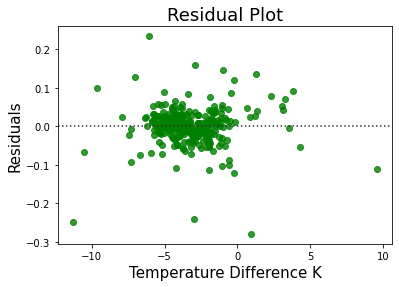

In [13]:
sns.residplot(data=merged, x='Thermal_Diff', y='NDVI_Diff', color='green')
plt.xlabel('Temperature Difference K', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residual Plot', fontsize=18)


### Temp Diff vs Golf NDVI

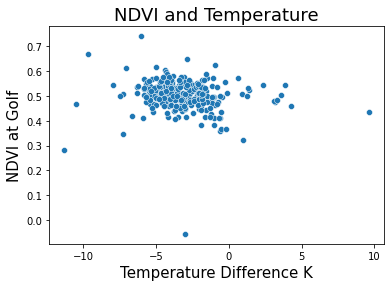

In [14]:
sns.scatterplot(data=merged, x= 'Thermal_Diff', y='NDVI_1')
plt.xlabel('Temperature Difference K', fontsize = 15)
plt.ylabel('NDVI at Golf', fontsize = 15)
plt.title('NDVI and Temperature', fontsize = 18)

plt.savefig('NDVI_therm_golf.png', dpi=300, bbox_inches='tight')

### Temp Diff vs COOP NDVI

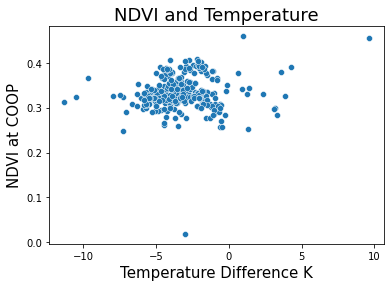

In [15]:
sns.scatterplot(data=merged, x= 'Thermal_Diff', y='NDVI_0')
plt.xlabel('Temperature Difference K', fontsize = 15)
plt.ylabel('NDVI at COOP', fontsize = 15)
plt.title('NDVI and Temperature', fontsize = 18)

plt.savefig('NDVI_therm_coop.png', dpi=300, bbox_inches='tight')

### Temp vs NDVI

Text(0.5, 1.0, 'NDVI and Temperature')

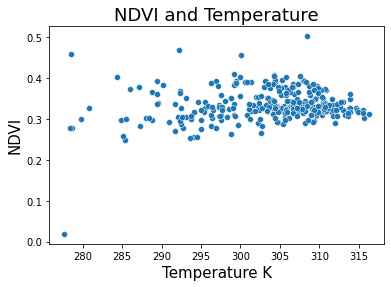

In [16]:
sns.scatterplot(data=merged, x= 'Thermal_0', y='NDVI_0')
plt.xlabel('Temperature K', fontsize = 15)
plt.ylabel('NDVI', fontsize = 15)
plt.title('NDVI and Temperature', fontsize = 18)
